In [8]:
import os
import requests
import json
import time
import numpy as np
import networkx as nx
# !apt install libgraphviz-dev
# !pip install pygraphviz
# !pip install vk-requests
# !pip install python-dotenv
from networkx.drawing.nx_agraph import graphviz_layout
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
%matplotlib inline

In [9]:

# Load environment variables from the .env file
load_dotenv()

# Check if the environment variable is loaded
access_token = os.getenv('VK_ACCESS_TOKEN')

# Print the token to verify (optional)
if access_token is None:
    print("Access Token not found. Please check your .env file.")
else:
    print("Access Token successfully loaded!!")

Access Token successfully loaded!!


In [10]:
# Получение списка друзей
response = requests.get(f'https://api.vk.com/method/friends.get?&fields=city,university&access_token={access_token}&v=5.131')
data = response.json()

# print(data)

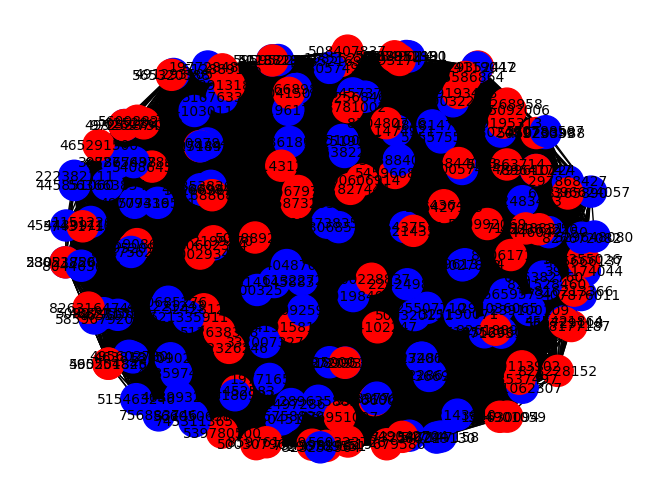

In [11]:
# Создание графа
G = nx.Graph()

# Добавление вершин и связей
friends = data['response']['items']
for friend in friends:
    friend_id = friend['id']
    G.add_node(friend_id, city=friend.get('city', {}).get('title'), university=friend.get('university_name'))

    # Создание связей на основе города
    for other_friend in friends:
        if friend_id != other_friend['id']:
            if friend.get('city') == other_friend.get('city'):
                G.add_edge(friend_id, other_friend['id'], relation='city')

            if friend.get('university') == other_friend.get('university'):
                G.add_edge(friend_id, other_friend['id'], relation='university')

# Визуализация графа
pos = nx.spring_layout(G)
edges = G.edges(data=True)

# Раскраска узлов по городу и университету
colors = []
for node in G.nodes(data=True):
    if node[1]['city']:
        colors.append('blue')  # Цвет для друзей из одного города
    elif node[1]['university']:
        colors.append('green')  # Цвет для друзей из одного университета
    else:
        colors.append('red')  # Цвет для остальных

nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500, font_size=10)
plt.show()